# BOF

In [1]:
import os
print(os.getcwd())
import gc
gc.collect()

import warnings
warnings.filterwarnings(action='ignore') # 'default'

import gc
gc.collect()

import pandas as pd
import numpy as np

import pickle

import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import tqdm
from tqdm import tqdm_notebook

from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score

import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
import math
from sklearn.model_selection import train_test_split

from matplotlib import rc
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False


from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


np.random.seed(1234)

/Users/baesangjun/Desktop/DACON/빅콘/Before Model


In [2]:
import pandas as pd
import numpy as np

import pickle

import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import tqdm
from tqdm import tqdm_notebook

from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

# Update data_v3_2_xy

In [3]:
data0 = pd.read_csv('data_v3_2_xy.csv')

In [4]:
data0.shape

(1051394, 41)

## dc

In [5]:
data0['public'] = 0
public_dc = ['단원할인','국립합창단유료회원할인','KLang할인','KBS교향악단후원회원할인','KOSYMI할인','심포니회원할인']
public_id = data0.loc[data0['dc'].isin(public_dc),'id'].unique()
data0.loc[data0.id.isin(public_id),'public'] = 1

data0['agency'] = 0
agency_id = data0.loc[data0['dc']=='기획사할인','id'].unique()
data0.loc[data0.id.isin(agency_id),'public'] = 1

data0.insert(10, 'agency', data0.pop('agency'))
data0.insert(10, 'public', data0.pop('public'))

## Sector

In [6]:
data0['sector'] = data0['block']
data0['sector'] = data0['sector'].combine_first(data0['box'])

box_map = {
    1:'a',
    2:'b',
    3:'c',
    4:'d',
    5:'e',
    6:'f',
    7:'g',
    8:'h',
    9:'i',
    10:'j',
    11:'k',
    12:'l'
}

data0['sector'] = data0['sector'].replace(box_map)
data0.insert(2, 'sector', data0.pop('sector'))

In [7]:
# 공연진행석
out = ['1층 A블록15열 9','1층 A블록15열 10','1층 A블록15열 11','1층 A블록15열 12',
       '1층 B블록15열 12','1층 B블록15열 13',
       '1층 C블록13열 1','1층 C블록13열 2','1층 C블록13열 3','1층 C블록13열 4','1층 C블록13열 5','1층 C블록13열 6',
       '2층 A블록8열 12','2층 A블록8열 13','2층 E블록8열 13','2층 E블록8열 12',
       '2층 C블록7열 1','2층 C블록7열 2','2층 C블록7열 12','2층 C블록7열 13']
ps = data0[data0.seat.isin(out)]
data0 = data0[~data0.seat.isin(out)]

# 휠체어석
out = ['1층 C블록22열 1','1층 C블록22열 2','1층 C블록22열 3','1층 C블록22열 4','1층 C블록22열 5','1층 C블록22열 6','1층 C블록22열 7','1층 C블록22열 8',
       '2층 A블록8열 1','2층 A블록8열 2','2층 A블록8열 3','2층 A블록8열 4','2층 A블록8열 5','2층 A블록8열 6','2층 A블록8열 7','2층 A블록8열 8',
       '2층 E블록8열 1','2층 E블록8열 2','2층 E블록8열 3','2층 E블록8열 4','2층 E블록8열 5','2층 E블록8열 6','2층 E블록8열 7','2층 E블록8열 8']
ws = data0[data0.seat.isin(out)]
data0 = data0[~data0.seat.isin(out)]

pws = pd.concat([ps,ws], axis=0, ignore_index=True)

In [8]:
data0.seat.nunique()

2465

In [9]:
# floor 2 box 1, 6
cond = (data0['floor']==2) & (data0['box'].isin([1,6])) & (data0['seat_num'].isin([1,2]))
data0.loc[cond,'col'] = 1

cond = (data0['floor']==2) & (data0['box'].isin([1,6])) & (data0['seat_num'].isin([3,4]))
data0.loc[cond,'col'] = 2

cond = (data0['floor']==2) & (data0['box'].isin([1,6])) & (data0['seat_num'].isin([5,6]))
data0.loc[cond,'col'] = 3

# floor 2 box 2, 5
cond = (data0['floor']==2) & (data0['box'].isin([2,5])) & (data0['seat_num'].isin([1,2]))
data0.loc[cond,'col'] = 1

cond = (data0['floor']==2) & (data0['box'].isin([2,5])) & (data0['seat_num'].isin([3,4]))
data0.loc[cond,'col'] = 2

cond = (data0['floor']==2) & (data0['box'].isin([2,5])) & (data0['seat_num'].isin([5,6]))
data0.loc[cond,'col'] = 3

cond = (data0['floor']==2) & (data0['box'].isin([2,5])) & (data0['seat_num'].isin([7,8]))
data0.loc[cond,'col'] = 4

# floor 2 box 3, 4
cond = (data0['floor']==2) & (data0['box'].isin([3,4])) & (data0['seat_num'].isin([1,2]))
data0.loc[cond,'col'] = 1

cond = (data0['floor']==2) & (data0['box'].isin([3,4])) & (data0['seat_num'].isin([3,4]))
data0.loc[cond,'col'] = 2

cond = (data0['floor']==2) & (data0['box'].isin([3,4])) & (data0['seat_num'].isin([5,6]))
data0.loc[cond,'col'] = 3

cond = (data0['floor']==2) & (data0['box'].isin([3,4])) & (data0['seat_num'].isin([7,8]))
data0.loc[cond,'col'] = 4

cond = (data0['floor']==2) & (data0['box'].isin([3,4])) & (data0['seat_num'].isin([9,10]))
data0.loc[cond,'col'] = 5

# floor 3 box 7, 12
cond = (data0['floor']==3) & (data0['box'].isin([7,12])) & (data0['seat_num'].isin([1,2,3]))
data0.loc[cond,'col'] = 1

cond = (data0['floor']==3) & (data0['box'].isin([7,12])) & (data0['seat_num'].isin([4,5,6]))
data0.loc[cond,'col'] = 2

# floor 3 box 8, 11
cond = (data0['floor']==3) & (data0['box'].isin([8,11])) & (data0['seat_num'].isin([1,2,3]))
data0.loc[cond,'col'] = 1

cond = (data0['floor']==3) & (data0['box'].isin([8,11])) & (data0['seat_num'].isin([4,5,6]))
data0.loc[cond,'col'] = 2

cond = (data0['floor']==3) & (data0['box'].isin([8,11])) & (data0['seat_num'].isin([7,8,9]))
data0.loc[cond,'col'] = 3

# floor 3 box 9, 10
cond = (data0['floor']==3) & (data0['box'].isin([9,10])) & (data0['seat_num'].isin([1,2,3]))
data0.loc[cond,'col'] = 1

cond = (data0['floor']==3) & (data0['box'].isin([9,10])) & (data0['seat_num'].isin([4,5,6]))
data0.loc[cond,'col'] = 2

cond = (data0['floor']==3) & (data0['box'].isin([9,10])) & (data0['seat_num'].isin([7,8,9]))
data0.loc[cond,'col'] = 3

cond = (data0['floor']==3) & (data0['box'].isin([9,10])) & (data0['seat_num'].isin([10,11,12]))
data0.loc[cond,'col'] = 4

In [10]:
data0 = data0.drop(columns=['box','block'])

In [11]:
data0.to_csv('data_v4_0.csv', index=False)

## Ratio of NA in cost and dc

In [12]:
cnr = data0.groupby('id')[['cost']].apply(lambda x: x.isna().sum() / len(x))\
    .rename(columns={'cost':'cnr'}).reset_index(drop=False)

In [13]:
cnr.shape

(731, 2)

### cnr1 : na_ratio=1

In [14]:
cnr1 = cnr[cnr['cnr']==1]
cnr = cnr[~cnr['id'].isin(cnr1.id)]  # update

print(100*(cnr1.shape[0]/731))

8.207934336525307


In [15]:
data0[data0['id'].isin(cnr1.id)].groupby('id')[['dc']].nunique()\
    .rename(columns={'dc':'nuni'})\
        .pipe(lambda df:df[df['nuni']>1])

,nuni
id,
898_2020-11-25,2


In [16]:
data0[data0['id'].isin(cnr1.id)].value_counts('dc', normalize=True)

dc
초대권할인    0.974034
카드할인     0.025957
차액할인     0.000009
dtype: float64

In [17]:
data0.loc[data0['id'].isin(cnr1.id),'dc'] = '초대권할인'

In [18]:
data0[data0['id'].isin(cnr1.id)].value_counts('dc', normalize=True)

dc
초대권할인    1.0
dtype: float64

### cnr2 : na_ratio in (0.9,1)

In [19]:
cnr2 = cnr[cnr['cnr']>0.9]
cnr = cnr[~cnr['id'].isin(cnr2.id)]  # update

print(100*(cnr2.shape[0]/731))

15.731874145006842


In [20]:
data0[data0['id'].isin(cnr2.id)].value_counts('dc', normalize=True)

dc
초대권할인          0.536901
기획사할인          0.423592
일반             0.014852
골드할인           0.008589
학생할인           0.002903
당일할인           0.002396
블루할인           0.002266
장애인/국가유공자할인    0.002043
그린할인           0.001908
싹틔우미할인         0.001829
조기예매할인         0.001145
노블할인           0.000600
단체할인           0.000293
차액할인           0.000233
후원회원할인         0.000140
타임세일           0.000116
경로할인           0.000051
이벤트특별할인        0.000047
교직원할인          0.000033
가족할인           0.000028
예술인할인          0.000023
관계자할인          0.000009
골드법인할인         0.000005
dtype: float64

In [21]:
data0.loc[(data0['id'].isin(cnr2.id)) & 
          (data0['dc']!='기획사할인'),'dc'] = '초대권할인'

In [22]:
data0[data0['id'].isin(cnr2.id)].value_counts('dc', normalize=True)

dc
초대권할인    0.576408
기획사할인    0.423592
dtype: float64

### cnr3 : na_ratio in (0.8,0.9]

In [23]:
cnr3 = cnr[cnr['cnr']>0.8]
cnr = cnr[~cnr['id'].isin(cnr3.id)]  # update

print(100*(cnr3.shape[0]/731))

6.839945280437757


In [24]:
data0[data0['id'].isin(cnr3.id)].value_counts('dc', normalize=True)

dc
초대권할인          0.527342
기획사할인          0.298803
일반             0.054142
골드할인           0.035802
조기예매할인         0.020734
블루할인           0.009549
싹틔우미할인         0.008440
장애인/국가유공자할인    0.008196
당일할인           0.008075
그린할인           0.008007
학생할인           0.007818
기업석            0.002719
노블할인           0.001623
카드할인           0.001271
재관람할인          0.001190
마니아할인          0.001150
기타특별할인         0.000987
차액할인           0.000839
경로할인           0.000595
가족할인           0.000514
코로나할인          0.000392
후원회원할인         0.000392
예술인할인          0.000338
예매권할인          0.000284
단체할인           0.000271
웰컴할인           0.000257
문화릴레이할인        0.000162
교직원할인          0.000108
dtype: float64

In [25]:
data0.loc[(data0['id'].isin(cnr3.id)) & 
          (data0['dc']!='기획사할인'),'dc'] = '초대권할인'

In [26]:
data0[data0['id'].isin(cnr3.id)].value_counts('dc', normalize=True)

dc
초대권할인    0.701197
기획사할인    0.298803
dtype: float64

### cnr4: na_ratio=0

In [27]:
cnr4 = cnr[cnr['cnr']==0]
cnr = cnr[~cnr['id'].isin(cnr4.id)]  # update

print(100*(cnr4.shape[0]/731))

4.651162790697675


### cnr : na_ratio in (0,0.8]

<Axes: xlabel='cnr', ylabel='Count'>

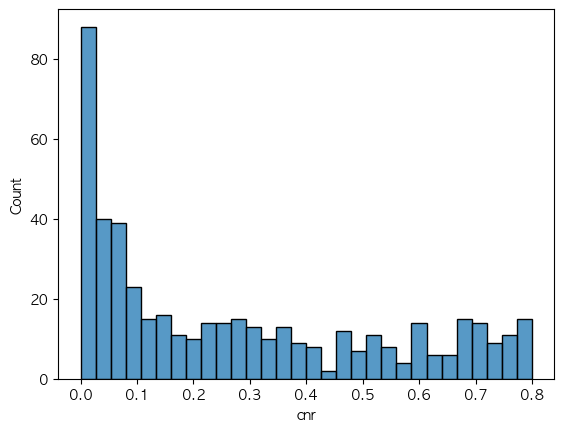

In [28]:
sns.histplot(x='cnr', data=cnr, bins=30)

# KNN

In [29]:
ddp = data0.drop_duplicates(subset=['id','seat'])

In [30]:
data_knn = ddp.loc[ddp.id.isin(cnr.id),['id','floor','seat','sector','x','y','seat_rnk','cost']]
data_not_knn = ddp.loc[~ddp.id.isin(cnr.id),['id','floor','seat','sector','x','y','seat_rnk','cost']]

## data_knn_1 : knn_id [id_floor_sector]

In [31]:
data_knn_1 = data_knn.copy()

In [32]:
# knn_id : id_floor_sector
data_knn_1['knn_id'] = data_knn_1['id'] + '_' + data_knn_1['floor'].astype(str) + '_' + data_knn_1['sector']
data_knn_1.insert(0, 'knn_id', data_knn_1.pop('knn_id'))

# target
data_knn_1['target'] = np.nan
cond = ~((data_knn_1['seat_rnk']=='N') | (data_knn_1['cost'].isna()))
data_knn_1.loc[cond,'target'] = data_knn_1.loc[cond,'seat_rnk'] + '_' + data_knn_1.loc[cond,'cost'].astype(str)

# na_ratio
data_knn_1 = data_knn_1.groupby('knn_id')[['target']].apply(lambda x: x.isna().sum() / len(x))\
    .rename(columns={'target':'na_ratio'}).reset_index().merge(data_knn_1, how='right')

In [33]:
data_good_1 = data_knn_1[data_knn_1['na_ratio']==0]

data_knn_1 = data_knn_1[~data_knn_1['knn_id'].isin(data_good_1.knn_id)]

In [34]:
data_knn_1

,knn_id,na_ratio,id,floor,seat,sector,x,y,seat_rnk,cost,target
2,528_2019-03-23_1_A,0.019868,528_2019-03-23,1,1층 A블록2열 1,A,18.0,30.0,A,180000.0,A_180000.0
3,1528_2019-07-21_1_C,0.158879,1528_2019-07-21,1,1층 C블록17열 3,C,46.0,45.0,R,75000.0,R_75000.0
5,2631_2022-12-27_2_D,0.696203,2631_2022-12-27,2,2층 D블록8열 3,D,73.0,75.0,A,120000.0,A_120000.0
6,1684_2023-04-12_1_C,0.517787,1684_2023-04-12,1,1층 C블록2열 2,C,48.0,30.0,R,130000.0,R_130000.0
7,221_2023-05-23_1_B,0.129032,221_2023-05-23,1,1층 B블록21열 9,B,36.0,49.0,R,110000.0,R_110000.0
...,...,...,...,...,...,...,...,...,...,...,...
458904,2841_2022-12-10_3_D,0.531915,2841_2022-12-10,3,3층 D블록6열 7,D,53.0,92.0,N,NaN,NaN
458905,1170_2019-12-22_2_A,0.453333,1170_2019-12-22,2,2층 A블록5열 5,A,15.0,72.0,A,80000.0,A_80000.0
458906,1528_2019-07-21_2_E,0.978723,1528_2019-07-21,2,2층 E블록4열 16,E,92.0,71.0,N,NaN,NaN
458907,1218_2023-05-02_1_E,0.645714,1218_2023-05-02,1,1층 E블록5열 10,E,84.0,33.0,N,NaN,NaN


In [35]:
# threshold = 0.8
knn_id = data_knn_1.knn_id.unique()

result_1 = pd.DataFrame()
out_id_1 = []
all_na_id = []

pbar = tqdm(knn_id, total=len(knn_id), desc='')
for i in pbar:
    pbar.set_description(f'{i} is being processed')
    
    df = data_knn_1[data_knn_1['knn_id']==i]
    
    scaler = MinMaxScaler()
    df[['x','y']] = scaler.fit_transform(df[['x','y']])
    
    train = df[~df['target'].isna()]
    X_train = train.loc[:,['x','y']]; y_train = train['target']
    X_test = df[df['target'].isna()].loc[:,['x','y']]
    
    n_neighbors = 3
    if X_train.shape[0] < n_neighbors:  # n_samples < n_neighbors (lack of sample under knn_id)
        out_id_1.append(df.iloc[0].knn_id)
    elif df.cost.isna().sum() == df.shape[0]:  # all NA under knn_id (df.cost.isna().sum()/df.shape[0]) > threshold
        all_na_id.append(df.iloc[0].knn_id)
    else:
        knn = KNeighborsClassifier(n_neighbors=n_neighbors)  # KNN
        knn.fit(X_train, y_train)
        pred = knn.predict(X_test)
        df.loc[df['target'].isna(),'target'] = pred
    
        result_1 = pd.concat([result_1,df], axis=0, ignore_index=True)

528_2019-03-23_1_A is being processed:   0%|          | 0/4753 [00:00<?, ?it/s]

452_2019-09-10_0_H is being processed: 100%|██████████| 4753/4753 [01:57<00:00, 40.55it/s]   


In [36]:
save_1 = result_1.copy()

In [37]:
# result = save_1.copy()

In [38]:
result_1.target.isna().sum()

0

In [39]:
result_1.groupby(['id','seat'])['cost'].nunique().reset_index()\
    .pipe(lambda df: df[df['cost']>1])

,id,seat,cost


In [40]:
fuck_id_1 = all_na_id + out_id_1

In [41]:
# Update
result_1['seat_rnk_new'] = [f for f in result_1['target'].str[0]]
result_1['cost_new'] = [f for f in result_1['target'].str[2:]]

result_1['floor'] = result_1['floor'].astype(int)
result_1['cost_new'] = result_1['cost_new'].astype(float).astype(int)

result_1['seat_rnk'] = result_1['seat_rnk_new']
result_1['cost'] = result_1['cost_new']
result_1 = result_1.drop(columns=['seat_rnk_new','cost_new'])

In [42]:
# Final 1
data1 = pd.concat([result_1,data_good_1], axis=0, ignore_index=True)

In [43]:
data1.isna().sum()

knn_id      0
na_ratio    0
id          0
floor       0
seat        0
sector      0
x           0
y           0
seat_rnk    0
cost        0
target      0
dtype: int64

## data_knn_2 : knn_id [id_floor]

In [44]:
data_knn_2 = data_knn.copy()

fuck_id_1_new = [s[:-2] for s in fuck_id_1]

In [45]:
# knn_id : id_floor
data_knn_2['knn_id'] = data_knn_2['id'] + '_' + data_knn_2['floor'].astype(str)
data_knn_2.insert(0, 'knn_id', data_knn_2.pop('knn_id'))

# Get
data_knn_2 = data_knn_2[data_knn_2['knn_id'].isin(fuck_id_1_new)]

# target
data_knn_2['target'] = np.nan
cond = ~((data_knn_2['seat_rnk']=='N') | (data_knn_2['cost'].isna()))
data_knn_2.loc[cond,'target'] = data_knn_2.loc[cond,'seat_rnk'] + '_' + data_knn_2.loc[cond,'cost'].astype(str)

# na_ratio
data_knn_2 = data_knn_2.groupby('knn_id')[['target']].apply(lambda x: x.isna().sum() / len(x))\
    .rename(columns={'target':'na_ratio'}).reset_index().merge(data_knn_2, how='right')

In [46]:
data_good_2 = data_knn_2[data_knn_2['na_ratio']==0]

<Axes: xlabel='na_ratio', ylabel='Count'>

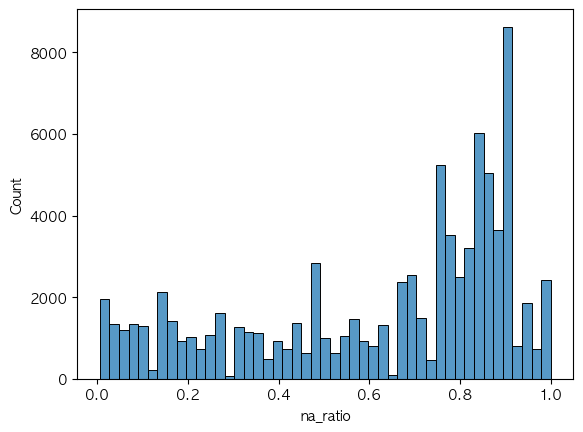

In [47]:
sns.histplot(x='na_ratio', data=data_knn_2)

In [48]:
threshold = 0.8
knn_id = data_knn_2.knn_id.unique()

result_2 = pd.DataFrame()
out_id_2 = []
threshold_na_id = []

pbar = tqdm(knn_id, total=len(knn_id), desc='')
for i in pbar:
    pbar.set_description(f'{i} is being processed')
    
    df = data_knn_2[data_knn_2['knn_id']==i]
    
    scaler = MinMaxScaler()
    df[['x','y']] = scaler.fit_transform(df[['x','y']])
    
    train = df[~df['target'].isna()]
    X_train = train.loc[:,['x','y']]; y_train = train['target']
    X_test = df[df['target'].isna()].loc[:,['x','y']]
    
    n_neighbors = 3
    if X_train.shape[0] < n_neighbors:  # n_samples < n_neighbors
        out_id_2.append(df.iloc[0].knn_id)
    elif (df.cost.isna().sum()/df.shape[0]) > threshold:  # 기준값(threshold)보다 cost의 NA 비율이 높을 때
        threshold_na_id.append(df.iloc[0].knn_id)
    else:
        knn = KNeighborsClassifier(n_neighbors=n_neighbors)  # KNN
        knn.fit(X_train, y_train)
        pred = knn.predict(X_test)
        df.loc[df['target'].isna(),'target'] = pred
    
        result_2 = pd.concat([result_2,df], axis=0, ignore_index=True)

2840_2021-12-14_3 is being processed:   0%|          | 0/524 [00:00<?, ?it/s]

452_2019-09-10_0 is being processed: 100%|██████████| 524/524 [00:04<00:00, 129.33it/s]   


In [49]:
save_2 = result_2.copy()

In [50]:
# result_2 = save_2.copy

In [51]:
result_2.target.isna().sum()

0

In [52]:
result_2

,knn_id,na_ratio,id,floor,seat,sector,x,y,seat_rnk,cost,target
0,2835_2023-06-29_3,0.03271,2835_2023-06-29,3,3층 M블록1열 2,M,0.326316,0.950000,B,10000.0,B_10000.0
1,2835_2023-06-29_3,0.03271,2835_2023-06-29,3,3층 M블록1열 14,M,0.452632,0.950000,B,10000.0,B_10000.0
2,2835_2023-06-29_3,0.03271,2835_2023-06-29,3,3층 D블록4열 3,D,0.484211,0.450000,A,30000.0,A_30000.0
3,2835_2023-06-29_3,0.03271,2835_2023-06-29,3,3층 M블록2열 13,M,0.442105,1.000000,B,10000.0,B_10000.0
4,2835_2023-06-29_3,0.03271,2835_2023-06-29,3,3층 G블록2열 3,G,0.978947,0.350000,B,10000.0,B_10000.0
...,...,...,...,...,...,...,...,...,...,...,...
51427,253_2019-08-27_3,0.12500,253_2019-08-27,3,3층 D블록5열 1,D,0.826923,1.000000,A,30000.0,A_30000.0
51428,253_2019-08-27_3,0.12500,253_2019-08-27,3,3층 BOX9 2,i,0.000000,0.000000,A,30000.0,A_30000.0
51429,253_2019-08-27_3,0.12500,253_2019-08-27,3,3층 BOX9 3,i,0.019231,0.000000,A,30000.0,A_30000.0
51430,253_2019-08-27_3,0.12500,253_2019-08-27,3,3층 D블록4열 9,D,0.980769,0.666667,A,30000.0,A_30000.0


In [53]:
result_2.groupby(['id','seat'])['cost'].nunique().reset_index()\
    .pipe(lambda df: df[df['cost']>1])

,id,seat,cost


In [54]:
fuck_id_2 = threshold_na_id + out_id_2

In [55]:
# Update
result_2['seat_rnk_new'] = [f for f in result_2['target'].str[0]]
result_2['cost_new'] = [f for f in result_2['target'].str[2:]]

result_2['floor'] = result_2['floor'].astype(int)
result_2['cost_new'] = result_2['cost_new'].astype(float).astype(int)

result_2['seat_rnk'] = result_2['seat_rnk_new']
result_2['cost'] = result_2['cost_new']
result_2 = result_2.drop(columns=['seat_rnk_new','cost_new'])

In [56]:
# Final 2
data2 = pd.concat([result_2,data_good_2], axis=0, ignore_index=True)

In [57]:
data2.isna().sum()

knn_id      0
na_ratio    0
id          0
floor       0
seat        0
sector      0
x           0
y           0
seat_rnk    0
cost        0
target      0
dtype: int64

## data_knn_3 : knn_id [id]

In [58]:
data_knn_3 = data_knn.copy()

fuck_id_2_new = [s[:-2] for s in fuck_id_2]

In [59]:
# knn_id : id
data_knn_3 = data_knn_3.rename(columns={'id':'knn_id'})

# Get
data_knn_3 = data_knn_3[data_knn_3['knn_id'].isin(fuck_id_2_new)]

# target
data_knn_3['target'] = np.nan
cond = ~((data_knn_3['seat_rnk']=='N') | (data_knn_3['cost'].isna()))
data_knn_3.loc[cond,'target'] = data_knn_3.loc[cond,'seat_rnk'] + '_' + data_knn_3.loc[cond,'cost'].astype(str)

# na_ratio
data_knn_3 = data_knn_3.groupby('knn_id')[['target']].apply(lambda x: x.isna().sum() / len(x))\
    .rename(columns={'target':'na_ratio'}).reset_index().merge(data_knn_3, how='right')

In [60]:
data_good_3 = data_knn_3[data_knn_3['na_ratio']==0]
data_good_3 = data_good_3.rename(columns={'knn_id':'id'})

0.8621673003802282


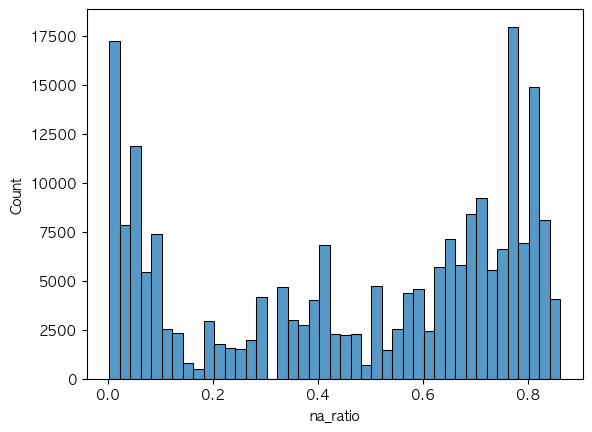

In [61]:
sns.histplot(x='na_ratio', data=data_knn_3)
print(data_knn_3.na_ratio.max())

In [62]:
knn_id = data_knn_3.knn_id.unique()

result_3 = pd.DataFrame()
out_id_3 = []
all_na_id = []

pbar = tqdm(knn_id, total=len(knn_id), desc='')
for i in pbar:
    pbar.set_description(f'{i} is being processed')
    
    df = data_knn_3[data_knn_3['knn_id']==i]
    
    scaler = MinMaxScaler()
    df[['x','y']] = scaler.fit_transform(df[['x','y']])
    
    train = df[~df['target'].isna()]
    X_train = train.loc[:,['x','y']]; y_train = train['target']
    X_test = df[df['target'].isna()].loc[:,['x','y']]
    
    n_neighbors = 3
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    df.loc[df['target'].isna(),'target'] = pred

    result_3 = pd.concat([result_3,df], axis=0, ignore_index=True)

2615_2021-07-23_1 is being processed: 100%|██████████| 250/250 [00:05<00:00, 45.12it/s]


In [63]:
save_3 = result_3.copy()

In [64]:
# result_3 = save_3.copy()

In [65]:
result_3.target.isna().sum()

0

In [66]:
result_3

,knn_id,na_ratio,floor,seat,sector,x,y,seat_rnk,cost,target
0,1528_2019-07-21,0.651676,1,1층 C블록17열 3,C,0.432692,0.222222,R,75000.0,R_75000.0
1,1528_2019-07-21,0.651676,3,3층 G블록6열 4,G,0.836538,0.875000,N,NaN,A_45000.0
2,1528_2019-07-21,0.651676,3,3층 G블록2열 3,G,0.913462,0.819444,N,NaN,A_45000.0
3,1528_2019-07-21,0.651676,1,1층 E블록16열 10,E,0.798077,0.208333,N,NaN,S_55000.0
4,1528_2019-07-21,0.651676,1,1층 B블록14열 12,B,0.384615,0.180556,R,75000.0,R_75000.0
...,...,...,...,...,...,...,...,...,...,...
219362,2615_2021-07-23_1,0.547945,1,1층 C블록16열 13,C,0.464789,0.589041,N,NaN,R_121000.0
219363,2615_2021-07-23_1,0.547945,1,1층 B블록19열 8,B,0.169014,0.630137,N,NaN,R_121000.0
219364,2615_2021-07-23_1,0.547945,1,1층 B블록9열 10,B,0.239437,0.493151,R,121000.0,R_121000.0
219365,2615_2021-07-23_1,0.547945,2,2층 C블록4열 4,C,0.380282,0.958904,A,88000.0,A_88000.0


In [67]:
result_3.groupby(['knn_id','seat'])['cost'].nunique().reset_index()\
    .pipe(lambda df: df[df['cost']>1])

,knn_id,seat,cost


In [68]:
# Update
result_3['seat_rnk_new'] = [f for f in result_3['target'].str[0]]
result_3['cost_new'] = [f for f in result_3['target'].str[2:]]

result_3['floor'] = result_3['floor'].astype(int)
result_3['cost_new'] = result_3['cost_new'].astype(float).astype(int)

result_3['seat_rnk'] = result_3['seat_rnk_new']
result_3['cost'] = result_3['cost_new']
result_3 = result_3.drop(columns=['seat_rnk_new','cost_new'])

result_3 = result_3.rename(columns={'knn_id':'id'})

In [69]:
# Final 3
data3 = pd.concat([result_3,data_good_3], axis=0, ignore_index=True)

In [70]:
data3.isna().sum()

id          0
na_ratio    0
floor       0
seat        0
sector      0
x           0
y           0
seat_rnk    0
cost        0
target      0
dtype: int64

# Final Output

## data_cost_filled

In [71]:
data4 = data0[data0.id.isin(cnr4.id)]

data_cost_filled = pd.concat([data1[['id','seat','seat_rnk','cost']],
                              data2[['id','seat','seat_rnk','cost']],
                              data3[['id','seat','seat_rnk','cost']],
                              data4[['id','seat','seat_rnk','cost']]])
data_cost_filled = data_cost_filled.drop_duplicates(subset=['id','seat'], keep='first')

In [72]:
data_cost_filled[['seat_rnk','cost']].isna().sum()

seat_rnk    0
cost        0
dtype: int64

In [73]:
# Check Duplicated id
data_cost_filled.groupby(['id','seat'])['cost'].nunique().reset_index()\
    .pipe(lambda df: df[df['cost']>1])

,id,seat,cost


## data_final

In [74]:
data00 = data0.drop(columns=['seat_rnk','cost'])

data_final = data00.merge(data_cost_filled, how='right')

In [75]:
data_final.shape

(644524, 42)

In [76]:
data_final.isna().sum().to_frame(name='na_cnt')

,na_cnt
age,196556
gender,196284
sector,0
골드,0
블루,0
그린,0
무료,0
싹틔우미,0
노블,0
member_yn,0


In [77]:
(pd.concat([cnr1.id,cnr2.id,cnr3.id]).shape[0] + data_final.id.nunique()) == data0.id.nunique()

True

In [78]:
check1 = data_final.groupby(['id'])['seat_rnk'].nunique().reset_index(name='total_rnk_new')
check2 = data0[['id','total_rnk']].drop_duplicates()
check3 = check1.merge(check2, how='left')

check3[check3['total_rnk_new']!=check3['total_rnk']]

,id,total_rnk_new,total_rnk
168,2290_2021-09-14,2,3


In [79]:
data_final.loc[data_final['id']=='2290_2021-09-14','total_rnk'] = 2  # 제외 좌석으로 인한 비일치

In [80]:
data_final.to_csv('data_v4_1_cost_filled.csv', index=False)

## data_fuck

In [81]:
data_fuck = data0[(data0.id.isin(cnr1.id)) |
                  (data0.id.isin(cnr2.id)) |
                  (data0.id.isin(cnr3.id))]

In [82]:
data_fuck.shape

(404512, 42)

In [83]:
(data_fuck[['id','seat']].drop_duplicates().shape[0] + data_final[['id','seat']].drop_duplicates().shape[0]) == data0[['id','seat']].drop_duplicates().shape[0]

True

In [84]:
data_fuck.to_csv('data_v4_2_cost_noise.csv', index=False)